In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/v9_after_eda_train.xlsx')

In [ ]:
# data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v8/v8_val/V8_after_EDA_val.xlsx')

In [ ]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry

In [ ]:
# data_test.columns

In [ ]:
# data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
#        'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
#        'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
#        'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
#        'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
#        'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
#        'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
#        'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
#        'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
#        'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
#        'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
#        'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
#        'PctAvgDailybalance2AvgMonthlyDeposits',
#        'Is_this_Business_home_based__c_Yes', 'Industry_Construction',
#        'Industry_E-Commerce', 'Industry_Finance, Insurance, Real Estate',
#        'Industry_Manufacturing', 'Industry_Mining', 'Industry_Retail',
#        'Industry_Services', 'Industry_Transportation & Public Utilities',
#        'Industry_Wholesale', 'Industry_Wholesale Trade']]

In [ ]:
data.head(3)

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000blHFEQA2,100.0,0.30,1,0,3,0.0,25553.69,3535.52,0,...,0,0,0,0,1,0,0,0,0,1
1,0062M00000bmHA5QAM,100.0,0.61,1,4,1,0.0,22265.24,4292.88,1,...,0,1,0,0,0,0,0,0,0,0
2,0062M00000bmhkAQAQ,100.0,0.55,1,0,2,0.0,25553.69,3535.52,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# data_test.head()

In [ ]:
data.shape

(3134, 44)

In [ ]:
# data_test.shape

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3134 non-null   object 
 1   Renewal_PreviousPace                        3134 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 3   Renewal_CountPreviousDeals                  3134 non-null   int64  
 4   Renewal_PreviousCountBounces                3134 non-null   int64  
 5   Renewal_PreviousPosition                    3134 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3134 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 9   Renewal_TwoWeekBounces                      3134 non-null   int64  
 10  NumberOfBank

In [ ]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                       -0.224085
Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
LatestMonth_ReturnItemDays                   -0.015710
Renewal_PreviousHBwLCF                       -0.014973
BankStatement_MA_NumReturnItems              -0.014653
PctAvgDailybalance2AvgMonthlyDeposits        -0.014379
AdjustedMonthlyDeposits                      -0.013616
drop_percent                                 -0.007704
Industry_Manufacturing                       -0.006627
Renewal_PreviousPosition                      0.001372
TwoMonthAvg_AdjustedMonthlyDeposits           0.001698
Renewal_Pr

In [ ]:
data.drop(['FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                       -0.224085
Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
LatestMonth_ReturnItemDays                   -0.015710
Renewal_PreviousHBwLCF                       -0.014973
BankStatement_MA_NumReturnItems              -0.014653
PctAvgDailybalance2AvgMonthlyDeposits        -0.014379
AdjustedMonthlyDeposits                      -0.013616
drop_percent                                 -0.007704
Industry_Manufacturing                       -0.006627
Renewal_PreviousPosition                      0.001372
TwoMonthAvg_AdjustedMonthlyDeposits           0.001698
Renewal_Pr

In [ ]:
data.shape

(3134, 44)

### Model Training

In [ ]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [ ]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Renewal_PreviousPace                        3134 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 2   Renewal_CountPreviousDeals                  3134 non-null   int64  
 3   Renewal_PreviousCountBounces                3134 non-null   int64  
 4   Renewal_PreviousPosition                    3134 non-null   int64  
 5   Renewal_PreviousHBwLCF                      3134 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 7   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 8   Renewal_TwoWeekBounces                      3134 non-null   int64  
 9   NumberOfBankStatements                      3134 non-null   int64  
 10  BankStatemen

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
#               'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
# y_test = data_test['WriteOff_YN']

In [ ]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
# print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
# print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2507, 38)
Shape of x_val is: (627, 38)
----------------------------------------------
Shape of y_train is: (2507,)
Shape of y_val is: (627,)


In [ ]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
# #checking the skewness of validation set
# print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
# print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

816.25

In [ ]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3526.08

In [ ]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8282.25

In [ ]:
weight = []
for i in data.index:
  if data['WriteOff_YN'][i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

3134

In [ ]:
# weight = []
# for i in y_train.index:
#   if y_train[i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

2507

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [ ]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [ ]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [ ]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
} 

In [ ]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

41

In [ ]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=25, subsample=0.75, use_label_encoder=False)

In [ ]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 25,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.75,
 'use_label_encoder': False}

In [ ]:
# predict_y_test = clf.predict(X_test)
# predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

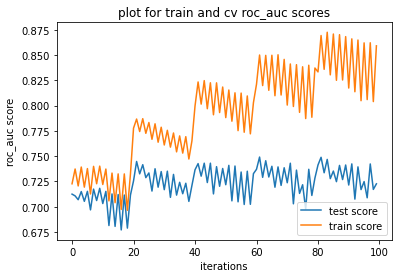

In [ ]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

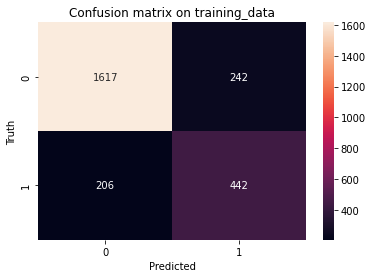

----------------------------
TP: 442
TN: 1617
FP: 242
FN: 206
F1-score: 0.6636636636636637
accuracy: 0.8213003589948146
Precision: 0.6461988304093568
Recall: 0.6820987654320988


In [ ]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

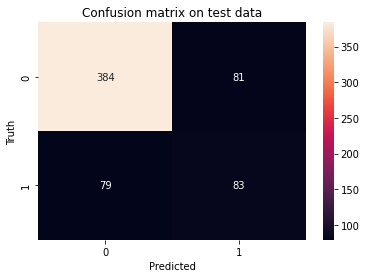

----------------------------
----------------------------
TP: 83
TN: 384
FP: 81
FN: 79
----------------------------
F1-score: 0.5092024539877301
accuracy: 0.74481658692185
Precision: 0.5060975609756098
Recall: 0.5123456790123457


In [ ]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

In [ ]:
# # on test set 
# sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
# plt.title('Confusion matrix on test data')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()
# print("----------------------------")

# tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
# print("----------------------------")

# print('TP: {}'.format(tp))
# print('TN: {}'.format(tn))
# print('FP: {}'.format(fp))
# print('FN: {}'.format(fn))
# print("----------------------------")

# print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
# print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
# print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
# print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

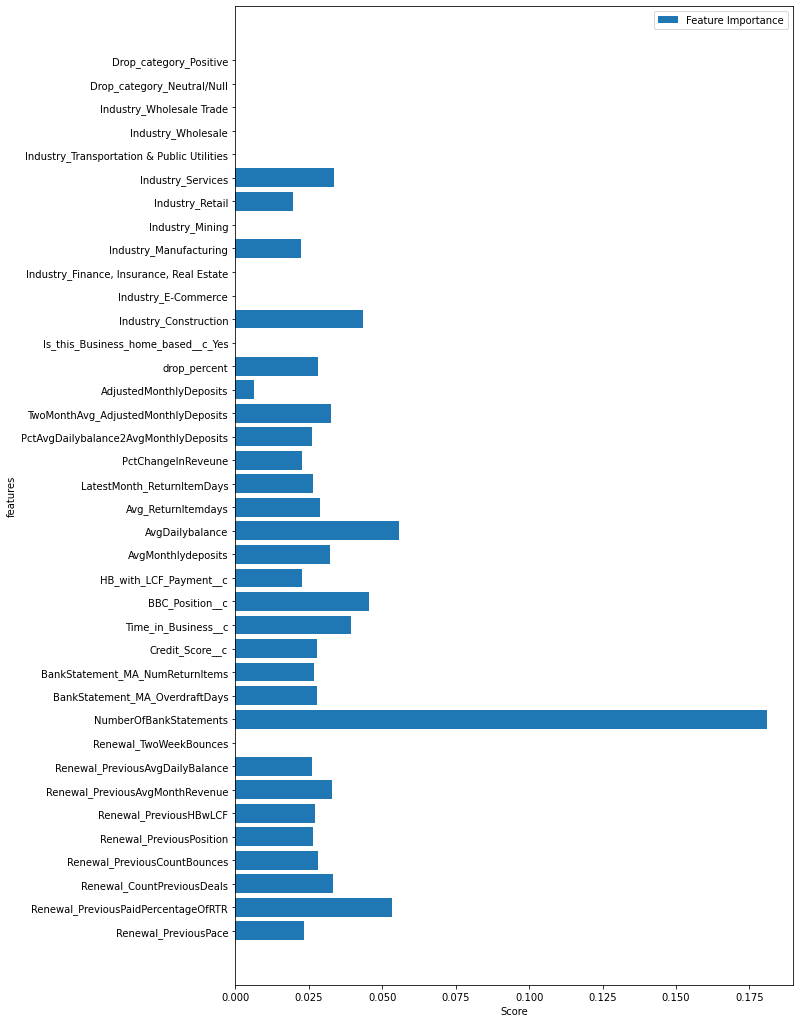

In [ ]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

# For Train data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
755,0
3123,0
221,0
543,0
1395,0
...,...
3092,0
1095,0
1130,0
1294,0


In [ ]:
check['Predicted Values'] = predict_y_train

In [ ]:
check

,WriteOff_YN,Predicted Values
755,0,0
3123,0,0
221,0,1
543,0,0
1395,0,0
...,...,...
3092,0,0
1095,0,0
1130,0,1
1294,0,0


In [ ]:
predict_y_proba_train

array([[0.9312046 , 0.06879537],
       [0.72936964, 0.27063033],
       [0.38695836, 0.61304164],
       ...,
       [0.2961716 , 0.7038284 ],
       [0.63180417, 0.36819583],
       [0.61937046, 0.38062957]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
755,0,0,0.068795
3123,0,0,0.270630
221,0,1,0.613042
543,0,0,0.164155
1395,0,0,0.195425
...,...,...,...
3092,0,0,0.344111
1095,0,0,0.248948
1130,0,1,0.703828
1294,0,0,0.368196


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
755,0,0,0.068795,0062M00000it89gQAA
3123,0,0,0.270630,0062M00000o7yiwQAA
221,0,1,0.613042,0062M00000ePjypQAC
543,0,0,0.164155,0062M00000ibbMMQAY
1395,0,0,0.195425,0062M00000lrPFdQAM
...,...,...,...,...
3092,0,0,0.344111,0062M00000nZiUUQA0
1095,0,0,0.248948,0062M00000ky5tQQAQ
1130,0,1,0.703828,0062M00000kypOWQAY
1294,0,0,0.368196,0062M00000lpNKnQAM


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9284971
Min_propability_value:  0.01565796


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
755,0,0,0.068795,0062M00000it89gQAA,2
3123,0,0,0.270630,0062M00000o7yiwQAA,5
221,0,1,0.613042,0062M00000ePjypQAC,9
543,0,0,0.164155,0062M00000ibbMMQAY,4
1395,0,0,0.195425,0062M00000lrPFdQAM,4
...,...,...,...,...,...
3092,0,0,0.344111,0062M00000nZiUUQA0,6
1095,0,0,0.248948,0062M00000ky5tQQAQ,5
1130,0,1,0.703828,0062M00000kypOWQAY,10
1294,0,0,0.368196,0062M00000lpNKnQAM,6


In [ ]:
check['Predicted_Prob_WO = 1'].nunique()

2494

In [ ]:
check['Predicted_Prob_WO = 1'].max()

0.9284971

In [ ]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.6744416236877444

In [ ]:
len(check[check['Decile']==10])

251

In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1844,0,0,0.015658,0062M00000lxUwqQAE,1
1884,0,0,0.016171,0062M00000mdrysQAA,1
453,0,0,0.017237,0062M00000gZi5tQAC,1
419,0,0,0.018237,0062M00000gYJs1QAG,1
2457,0,0,0.019112,0062M00000n2jgwQAA,1
...,...,...,...,...,...
3034,1,1,0.885965,0062M00000nYPkbQAG,10
1077,1,1,0.891296,0062M00000kxTpzQAE,10
2977,1,1,0.893767,0062M00000nXvKlQAK,10
536,1,1,0.926152,0062M00000iauvvQAA,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1844,0,0,0.015658,0062M00000lxUwqQAE,1
1884,0,0,0.016171,0062M00000mdrysQAA,1
453,0,0,0.017237,0062M00000gZi5tQAC,1
419,0,0,0.018237,0062M00000gYJs1QAG,1
2457,0,0,0.019112,0062M00000n2jgwQAA,1
...,...,...,...,...,...
3034,1,1,0.885965,0062M00000nYPkbQAG,10
1077,1,1,0.891296,0062M00000kxTpzQAE,10
2977,1,1,0.893767,0062M00000nXvKlQAK,10
536,1,1,0.926152,0062M00000iauvvQAA,10


In [ ]:
len(exp_df[exp_df['Decile']==1])

251

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

2507

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

648

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    250
1      1
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(1, 6, 7, 17, 32, 55, 61, 114, 150, 205)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(1, 7, 14, 31, 63, 118, 179, 293, 443, 648)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

0.398406374501992 2.3904382470119523 2.8 6.772908366533865 12.749003984063744 22.0 24.302788844621514 45.6 59.7609561752988 81.67330677290836


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

0.15432098765432098 1.0802469135802468 2.1604938271604937 4.78395061728395 9.722222222222223 18.209876543209877 27.623456790123456 45.21604938271605 68.3641975308642 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.015432098765432098 0.05401234567901234 0.07201646090534979 0.11959876543209876 0.19444444444444448 0.30349794238683125 0.39462081128747795 0.5652006172839507 0.75960219478738 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.06430839,
 0.104265355,
 0.1576544,
 0.22500584,
 0.30393,
 0.3801815,
 0.4730651,
 0.567828,
 0.6733421,
 0.9284971]

In [ ]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.01565796,
 0.064383104,
 0.10479473,
 0.15785286,
 0.22515929,
 0.3041986,
 0.38057134,
 0.47385764,
 0.5679967,
 0.6760909]

In [ ]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[4.56, 8.28, 13.01, 19.3, 26.66, 34.14, 42.65, 52.13, 61.84, 75.76]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[251, 251, 250, 251, 251, 250, 251, 250, 251, 251]

In [ ]:
funded_amt

[3977050.0,
 4193375.0,
 5735250.0,
 4860895.0,
 5524462.0,
 7167265.0,
 6040192.79,
 5059057.0,
 6095180.92,
 6930349.93]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.07155145, 0.07544338, 0.10318338, 0.08745279, 0.09939108,
       0.12894689, 0.10866964, 0.09101794, 0.10965893, 0.12468453])

In [ ]:
gross_amt

[1043.29,
 22093.81,
 9594.98,
 29415.389999999996,
 243366.86,
 239168.58,
 369888.30999999994,
 774984.27,
 1499884.2900000003,
 2781851.5300000007]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.0001747176524871301,
 0.0038747230370845868,
 0.005481574805299525,
 0.010407710288044882,
 0.05116386291326322,
 0.09121693813326952,
 0.15316138043179806,
 0.2829464185025667,
 0.5341289872525077,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0002623276046315736,
 0.005268741765284526,
 0.001672983740900571,
 0.006051434972366199,
 0.04405259009836614,
 0.03336957402858692,
 0.061237831781193845,
 0.15318749521897065,
 0.24607707460798395,
 0.40140130846177935]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,251,1,0.398406,0.154321,3977050.00,0.071551,1043.29,0.000262,0.000175,5943.29,4.56,1.57,6.43
1,2,251,6,2.390438,1.080247,4193375.00,0.075443,22093.81,0.005269,0.003875,43996.91,8.28,6.44,10.43
2,3,250,7,2.800000,2.160494,5735250.00,0.103183,9594.98,0.001673,0.005482,78372.91,13.01,10.48,15.77
3,4,251,17,6.772908,4.783951,4860895.00,0.087453,29415.39,0.006051,0.010408,214967.54,19.30,15.79,22.50
4,5,251,32,12.749004,9.722222,5524462.00,0.099391,243366.86,0.044053,0.051164,531012.72,26.66,22.52,30.39
5,6,250,55,22.000000,18.209877,7167265.00,0.128947,239168.58,0.033370,0.091217,535826.08,34.14,30.42,38.02
6,7,251,61,24.302789,27.623457,6040192.79,0.108670,369888.31,0.061238,0.153161,958454.44,42.65,38.06,47.31
7,8,250,114,45.600000,45.216049,5059057.00,0.091018,774984.27,0.153187,0.282946,1642597.98,52.13,47.39,56.78
8,9,251,150,59.760956,68.364198,6095180.92,0.109659,1499884.29,0.246077,0.534129,3252328.57,61.84,56.80,67.33
9,10,251,205,81.673307,100.000000,6930349.93,0.124685,2781851.53,0.401401,1.000000,5571524.87,75.76,67.61,92.85


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,251,1,0.40,0.15,3977050.00,7.16,1043.29,0.03,0.02,5943.29,4.56,1.57,6.43
1,2,251,6,2.39,1.08,4193375.00,7.54,22093.81,0.53,0.39,43996.91,8.28,6.44,10.43
2,3,250,7,2.80,2.16,5735250.00,10.32,9594.98,0.17,0.55,78372.91,13.01,10.48,15.77
3,4,251,17,6.77,4.78,4860895.00,8.75,29415.39,0.61,1.04,214967.54,19.30,15.79,22.50
4,5,251,32,12.75,9.72,5524462.00,9.94,243366.86,4.41,5.12,531012.72,26.66,22.52,30.39
5,6,250,55,22.00,18.21,7167265.00,12.89,239168.58,3.34,9.12,535826.08,34.14,30.42,38.02
6,7,251,61,24.30,27.62,6040192.79,10.87,369888.31,6.12,15.32,958454.44,42.65,38.06,47.31
7,8,250,114,45.60,45.22,5059057.00,9.10,774984.27,15.32,28.29,1642597.98,52.13,47.39,56.78
8,9,251,150,59.76,68.36,6095180.92,10.97,1499884.29,24.61,53.41,3252328.57,61.84,56.80,67.33
9,10,251,205,81.67,100.00,6930349.93,12.47,2781851.53,40.14,100.00,5571524.87,75.76,67.61,92.85


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

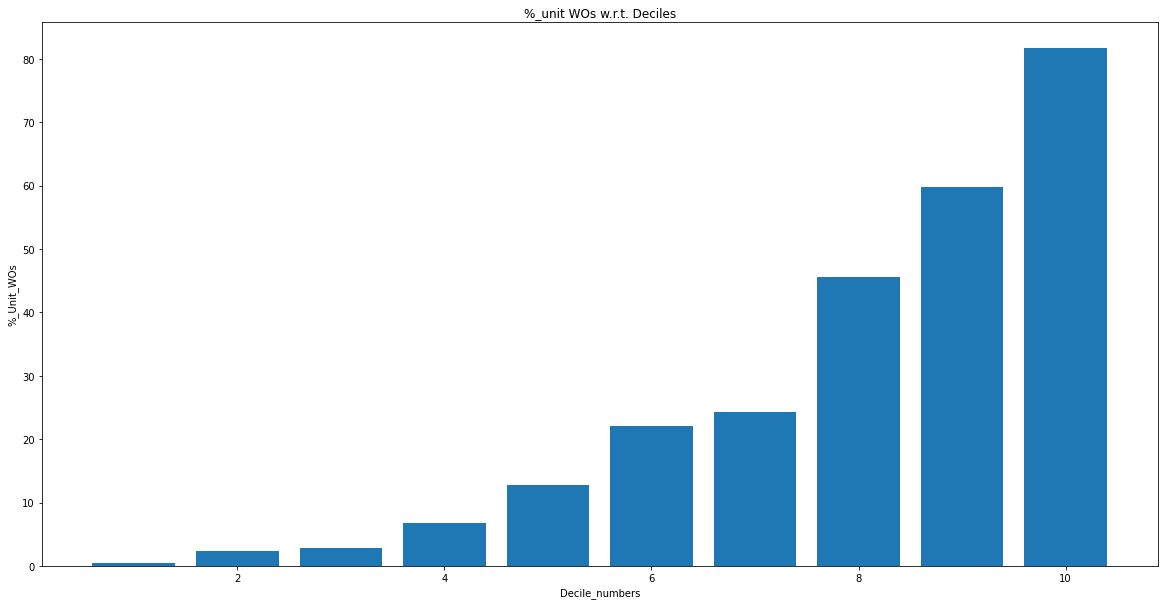

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

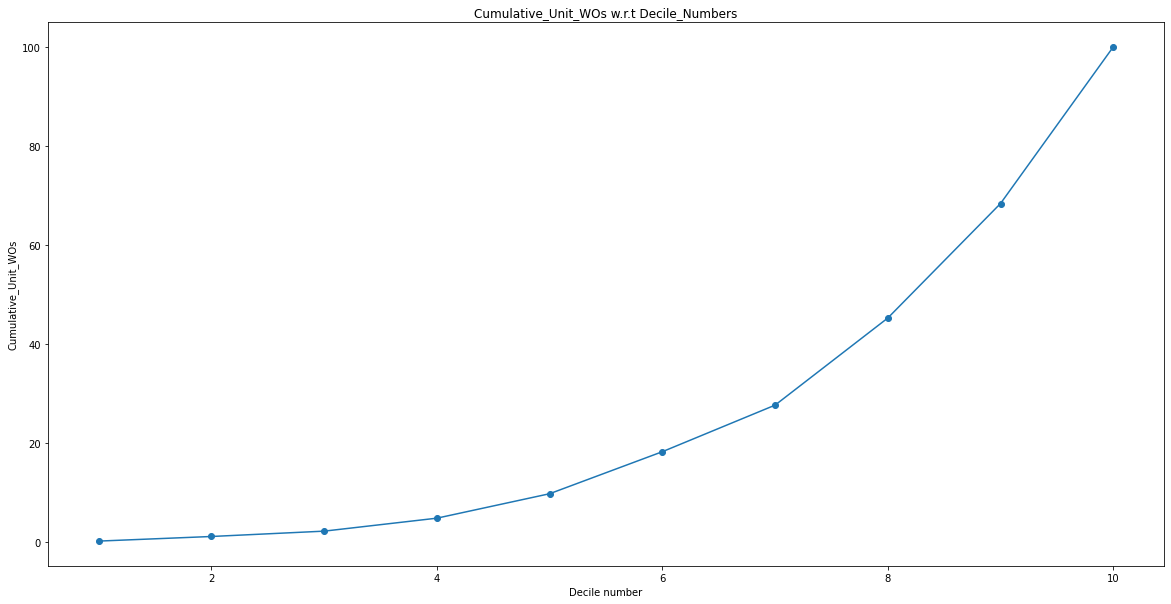

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [ ]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
1786,0
528,0
449,0
1292,1
1097,0
...,...
2684,1
1237,0
2912,1
2721,1


In [ ]:
check['Predicted Values'] = predict_y_val

In [ ]:
check

,WriteOff_YN,Predicted Values
1786,0,0
528,0,0
449,0,1
1292,1,1
1097,0,0
...,...,...
2684,1,1
1237,0,0
2912,1,0
2721,1,0


In [ ]:
predict_y_proba_val

array([[0.5789025 , 0.42109752],
       [0.7268082 , 0.27319184],
       [0.4944927 , 0.5055073 ],
       ...,
       [0.6321957 , 0.3678043 ],
       [0.76543814, 0.23456188],
       [0.9073677 , 0.09263232]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1786,0,0,0.421098
528,0,0,0.273192
449,0,1,0.505507
1292,1,1,0.751052
1097,0,0,0.083135
...,...,...,...
2684,1,1,0.828017
1237,0,0,0.078300
2912,1,0,0.367804
2721,1,0,0.234562


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1786,0,0,0.421098,0062M00000lXc3SQAS
528,0,0,0.273192,0062M00000iap0AQAQ
449,0,1,0.505507,0062M00000gZCzBQAW
1292,1,1,0.751052,0062M00000lpNB6QAM
1097,0,0,0.083135,0062M00000ky8eKQAQ
...,...,...,...,...
2684,1,1,0.828017,0062M00000nomOBQAY
1237,0,0,0.078300,0062M00000l0bcDQAQ
2912,1,0,0.367804,0062M00000nX2oIQAS
2721,1,0,0.234562,0062M00000npHaPQAU


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.90478456
Min_propability_value:  0.014321851


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1786,0,0,0.421098,0062M00000lXc3SQAS,7
528,0,0,0.273192,0062M00000iap0AQAQ,5
449,0,1,0.505507,0062M00000gZCzBQAW,8
1292,1,1,0.751052,0062M00000lpNB6QAM,10
1097,0,0,0.083135,0062M00000ky8eKQAQ,2
...,...,...,...,...,...
2684,1,1,0.828017,0062M00000nomOBQAY,10
1237,0,0,0.078300,0062M00000l0bcDQAQ,2
2912,1,0,0.367804,0062M00000nX2oIQAS,6
2721,1,0,0.234562,0062M00000npHaPQAU,5


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1356,0,0,0.014322,0062M00000lr5eRQAQ,1
1651,0,0,0.015413,0062M00000lw0k5QAA,1
1283,0,0,0.019581,0062M00000lpfYYQAY,1
2132,0,0,0.026516,0062M00000mTGsbQAG,1
438,0,0,0.026791,0062M00000gZ0GrQAK,1
...,...,...,...,...,...
1961,1,1,0.864678,0062M00000mfOU2QAM,10
120,0,1,0.873549,0062M00000dhsQwQAI,10
332,0,1,0.890555,0062M00000ga93OQAQ,10
756,1,1,0.900068,0062M00000it8QXQAY,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1356,0,0,0.014322,0062M00000lr5eRQAQ,1
1651,0,0,0.015413,0062M00000lw0k5QAA,1
1283,0,0,0.019581,0062M00000lpfYYQAY,1
2132,0,0,0.026516,0062M00000mTGsbQAG,1
438,0,0,0.026791,0062M00000gZ0GrQAK,1
...,...,...,...,...,...
1961,1,1,0.864678,0062M00000mfOU2QAM,10
120,0,1,0.873549,0062M00000dhsQwQAI,10
332,0,1,0.890555,0062M00000ga93OQAQ,10
756,1,1,0.900068,0062M00000it8QXQAY,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

627

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

162

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    49
1     4
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(4, 7, 6, 9, 9, 15, 20, 30, 33, 29)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(4, 11, 17, 26, 35, 50, 70, 100, 133, 162)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

7.547169811320755 9.333333333333334 10.169491525423728 15.0 16.071428571428573 25.423728813559322 25.0 40.54054054054054 56.89655172413793 54.716981132075475


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

2.4691358024691357 6.790123456790123 10.493827160493826 16.049382716049383 21.604938271604937 30.864197530864196 43.20987654320987 61.72839506172839 82.09876543209876 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.24691358024691357 0.3395061728395062 0.34979423868312753 0.4012345679012346 0.43209876543209874 0.51440329218107 0.6172839506172839 0.7716049382716049 0.9122085048010973 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[53, 75, 59, 60, 56, 59, 80, 74, 58, 53]

In [ ]:
sum(no_of_opps)

627

In [ ]:
funded_amt

[730400.0,
 1184000.0,
 1002350.0,
 1382200.0,
 1491000.0,
 1636245.0,
 1218021.0,
 1875700.0,
 1266000.0,
 875000.0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.05768935, 0.09351614, 0.07916884, 0.10917062, 0.11776399,
       0.12923591, 0.09620323, 0.14814884, 0.09999277, 0.06911032])

In [ ]:
gross_amt

[6182.44,
 17352.01,
 19177.92,
 44369.22,
 186085.25,
 221336.73999999996,
 63824.68,
 254764.16000000003,
 380293.06,
 159925.59999999998]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.004568380538198209,
 0.01739027363908082,
 0.03156138350688741,
 0.06434706054427633,
 0.20185073782149182,
 0.36540274243524257,
 0.4125646115304103,
 0.6008170863420405,
 0.8818264312149132,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0084644578313253,
 0.01465541385135135,
 0.019132957549758068,
 0.032100434090580235,
 0.12480566733735748,
 0.13527114826936062,
 0.052400311653083155,
 0.13582351122247696,
 0.30038946287519747,
 0.18277211428571427]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,53,4,7.547170,2.469136,730400.0,0.057689,6182.44,0.008464,0.004568,45737.92,4.56,1.57,6.43
1,2,75,7,9.333333,6.790123,1184000.0,0.093516,17352.01,0.014655,0.017390,66642.95,8.28,6.44,10.43
2,3,59,6,10.169492,10.493827,1002350.0,0.079169,19177.92,0.019133,0.031561,61280.72,13.01,10.48,15.77
3,4,60,9,15.000000,16.049383,1382200.0,0.109171,44369.22,0.032100,0.064347,82068.47,19.30,15.79,22.50
4,5,56,9,16.071429,21.604938,1491000.0,0.117764,186085.25,0.124806,0.201851,371743.71,26.66,22.52,30.39
5,6,59,15,25.423729,30.864198,1636245.0,0.129236,221336.74,0.135271,0.365403,577656.94,34.14,30.42,38.02
6,7,80,20,25.000000,43.209877,1218021.0,0.096203,63824.68,0.052400,0.412565,151339.59,42.65,38.06,47.31
7,8,74,30,40.540541,61.728395,1875700.0,0.148149,254764.16,0.135824,0.600817,695403.53,52.13,47.39,56.78
8,9,58,33,56.896552,82.098765,1266000.0,0.099993,380293.06,0.300389,0.881826,698976.06,61.84,56.80,67.33
9,10,53,29,54.716981,100.000000,875000.0,0.069110,159925.60,0.182772,1.000000,330814.17,75.76,67.61,92.85


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,53,4,7.55,2.47,730400.0,5.77,6182.44,0.85,0.46,45737.92,4.56,1.57,6.43
1,2,75,7,9.33,6.79,1184000.0,9.35,17352.01,1.47,1.74,66642.95,8.28,6.44,10.43
2,3,59,6,10.17,10.49,1002350.0,7.92,19177.92,1.91,3.16,61280.72,13.01,10.48,15.77
3,4,60,9,15.00,16.05,1382200.0,10.92,44369.22,3.21,6.43,82068.47,19.30,15.79,22.50
4,5,56,9,16.07,21.60,1491000.0,11.78,186085.25,12.48,20.19,371743.71,26.66,22.52,30.39
5,6,59,15,25.42,30.86,1636245.0,12.92,221336.74,13.53,36.54,577656.94,34.14,30.42,38.02
6,7,80,20,25.00,43.21,1218021.0,9.62,63824.68,5.24,41.26,151339.59,42.65,38.06,47.31
7,8,74,30,40.54,61.73,1875700.0,14.81,254764.16,13.58,60.08,695403.53,52.13,47.39,56.78
8,9,58,33,56.90,82.10,1266000.0,10.00,380293.06,30.04,88.18,698976.06,61.84,56.80,67.33
9,10,53,29,54.72,100.00,875000.0,6.91,159925.60,18.28,100.00,330814.17,75.76,67.61,92.85


<BarContainer object of 10 artists>

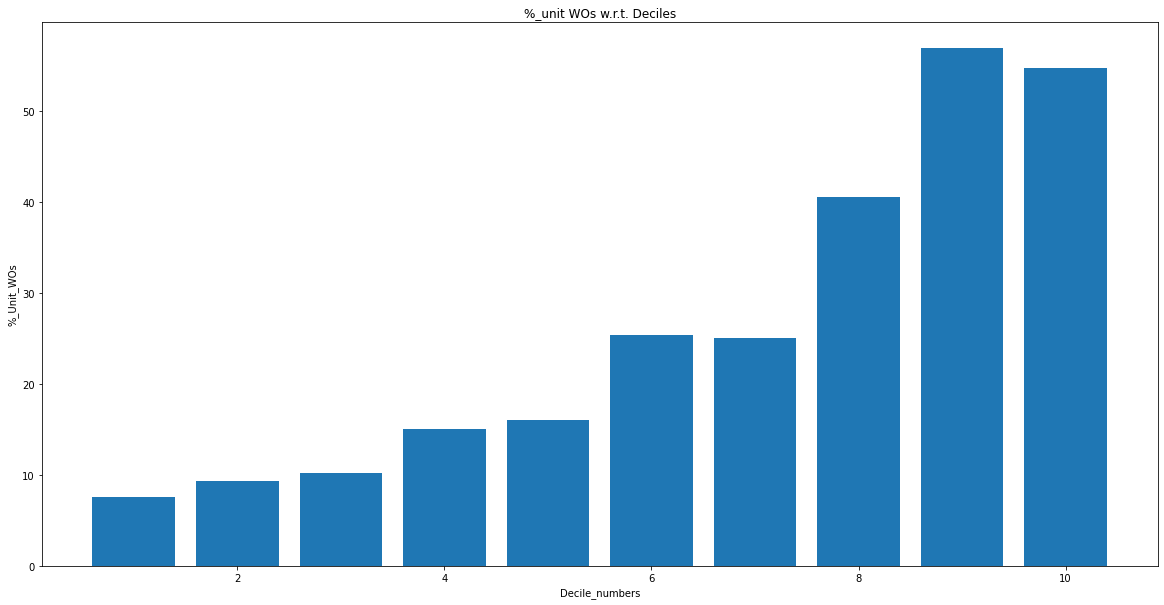

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

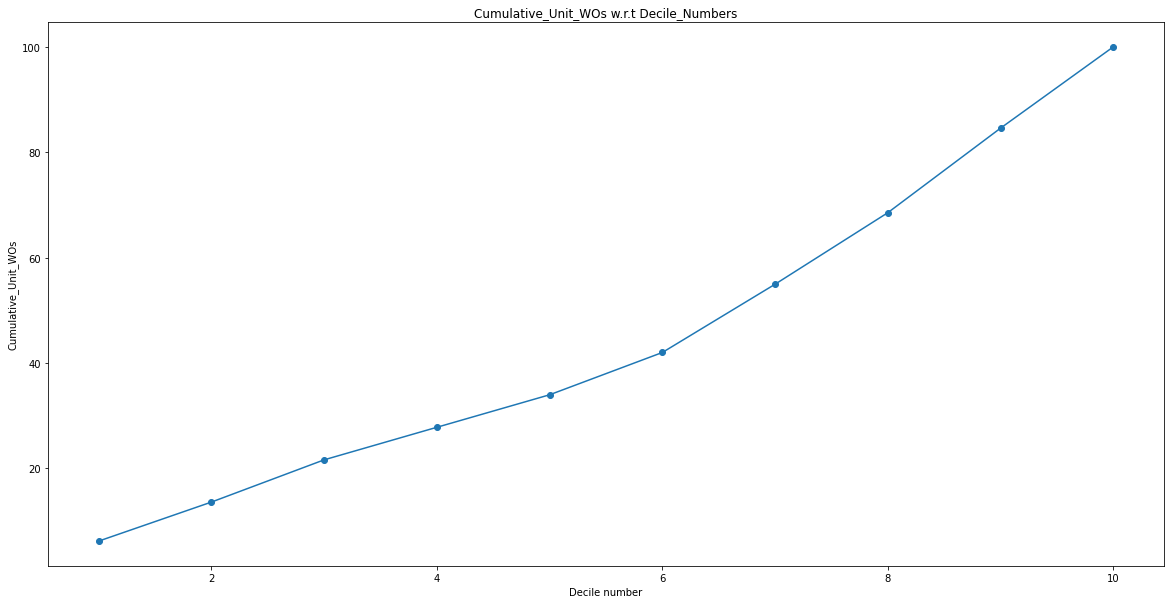

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
481,0,0
482,0,0
483,0,0
484,0,1


In [ ]:
print(predict_y_proba_test)

[[0.8507122  0.1492878 ]
 [0.4810174  0.5189826 ]
 [0.43178594 0.56821406]
 [0.8847761  0.11522388]
 [0.5352453  0.46475467]
 [0.7830865  0.21691352]
 [0.80820966 0.19179033]
 [0.7893996  0.21060038]
 [0.5421703  0.45782968]
 [0.7651267  0.23487328]
 [0.60468185 0.39531812]
 [0.92384803 0.07615194]
 [0.8331073  0.16689269]
 [0.66734415 0.33265585]
 [0.6040852  0.3959148 ]
 [0.92965007 0.0703499 ]
 [0.88261133 0.11738865]
 [0.49143076 0.50856924]
 [0.50539815 0.49460188]
 [0.7409117  0.25908828]
 [0.825393   0.17460698]
 [0.9076354  0.09236459]
 [0.75924855 0.24075143]
 [0.82393533 0.17606466]
 [0.89590317 0.10409685]
 [0.5035623  0.49643773]
 [0.9056675  0.09433249]
 [0.6720352  0.32796475]
 [0.95648193 0.0435181 ]
 [0.8601836  0.13981637]
 [0.88219404 0.11780596]
 [0.58337647 0.41662353]
 [0.7726771  0.22732286]
 [0.5142935  0.4857065 ]
 [0.48293632 0.5170637 ]
 [0.7590346  0.24096543]
 [0.7882874  0.21171263]
 [0.8863606  0.1136394 ]
 [0.8838926  0.11610742]
 [0.90941954 0.09058043]


In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,0,0.149288
1,0,1,0.518983
2,0,1,0.568214
3,0,0,0.115224
4,0,0,0.464755
...,...,...,...
481,0,0,0.360714
482,0,0,0.386907
483,0,0,0.453852
484,0,1,0.533414


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,0,0.149288,0062M00000nqf6oQAA
1,0,1,0.518983,0062M00000nqfF3QAI
2,0,1,0.568214,0062M00000nqjtvQAA
3,0,0,0.115224,0062M00000nqs8FQAQ
4,0,0,0.464755,0062M00000nr94cQAA
...,...,...,...,...
481,0,0,0.360714,0062M00000oYVfWQAW
482,0,0,0.386907,0062M00000oYVWyQAO
483,0,0,0.453852,0062M00000oYYg7QAG
484,0,1,0.533414,0062M00000oYZI3QAO


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.84135354
Min_propability_value:  0.032590542


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data_test['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data_test['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data_test['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data_test['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data_test['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data_test['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data_test['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data_test['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data_test['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data_test['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data_test['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data_test['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,0,0.149288,0062M00000nqf6oQAA,4
1,0,1,0.518983,0062M00000nqfF3QAI,10
2,0,1,0.568214,0062M00000nqjtvQAA,10
3,0,0,0.115224,0062M00000nqs8FQAQ,3
4,0,0,0.464755,0062M00000nr94cQAA,9
...,...,...,...,...,...
481,0,0,0.360714,0062M00000oYVfWQAW,8
482,0,0,0.386907,0062M00000oYVWyQAO,8
483,0,0,0.453852,0062M00000oYYg7QAG,9
484,0,1,0.533414,0062M00000oYZI3QAO,10


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
383,0,0,0.032591,0062M00000oQBoXQAW,1
54,0,0,0.034053,0062M00000o8uO4QAI,1
212,0,0,0.035022,0062M00000oB7wvQAC,1
307,0,0,0.035171,0062M00000oPjv7QAC,1
267,0,0,0.035209,0062M00000oOkeoQAC,1
...,...,...,...,...,...
279,1,1,0.778919,0062M00000oOzEbQAK,10
63,0,1,0.779049,0062M00000o8wSvQAI,10
362,0,1,0.811032,0062M00000oQ0n4QAC,10
290,0,1,0.823769,0062M00000oPA8rQAG,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
383,0,0,0.032591,0062M00000oQBoXQAW,1
54,0,0,0.034053,0062M00000o8uO4QAI,1
212,0,0,0.035022,0062M00000oB7wvQAC,1
307,0,0,0.035171,0062M00000oPjv7QAC,1
267,0,0,0.035209,0062M00000oOkeoQAC,1
...,...,...,...,...,...
279,1,1,0.778919,0062M00000oOzEbQAK,10
63,0,1,0.779049,0062M00000o8wSvQAI,10
362,0,1,0.811032,0062M00000oQ0n4QAC,10
290,0,1,0.823769,0062M00000oPA8rQAG,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

486

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    44
1    10
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(10, 3, 7, 9, 12, 7, 10, 16, 20, 20)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(10, 13, 20, 29, 41, 48, 58, 74, 94, 114)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

18.51851851851852 7.6923076923076925 17.5 19.565217391304348 21.428571428571427 15.909090909090908 23.80952380952381 28.571428571428573 35.08771929824562 38.46153846153846


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

8.771929824561402 11.403508771929824 17.543859649122805 25.438596491228072 35.96491228070175 42.10526315789473 50.877192982456144 64.91228070175438 82.45614035087719 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.8771929824561402 0.5701754385964912 0.5847953216374269 0.6359649122807018 0.7192982456140351 0.7017543859649122 0.7268170426065164 0.8114035087719298 0.9161793372319688 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[54, 39, 40, 46, 56, 44, 42, 56, 57, 52]

In [ ]:
sum(no_of_opps)

486

In [ ]:
funded_amt

[1117500,
 771500,
 636000,
 962500,
 3789478,
 2030000,
 1110000,
 1515300,
 887123,
 1449000]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.07831992, 0.05407053, 0.04457402, 0.06745675, 0.26558533,
       0.14227242, 0.07779428, 0.10619971, 0.06217396, 0.10155308])

In [ ]:
gross_amt

[51559.91,
 8325.630000000001,
 45018.84999999999,
 92926.06999999999,
 77672.76999999999,
 267127.33,
 44064.74,
 126072.97999999998,
 86082.04,
 195064.02]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.05187560730837227,
 0.06025221449164322,
 0.10554671139969667,
 0.1990417604800832,
 0.2771901147939972,
 0.5459530446054335,
 0.5902875895723569,
 0.7171325045979314,
 0.8037416182163143,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.04613862192393736,
 0.010791484121840571,
 0.07078435534591193,
 0.09654656623376623,
 0.02049695762846492,
 0.13158981773399014,
 0.03969796396396396,
 0.08320001319870651,
 0.0970350672905561,
 0.13461975155279501]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,54,10,18.518519,8.771930,1117500,0.078320,51559.91,0.046139,0.051876,95335.66,6.07,2.73,7.97
1,2,39,3,7.692308,11.403509,771500,0.054071,8325.63,0.010791,0.060252,20028.13,9.38,7.97,10.98
2,3,40,7,17.500000,17.543860,636000,0.044574,45018.85,0.070784,0.105547,112060.85,12.32,10.99,13.77
3,4,46,9,19.565217,25.438596,962500,0.067457,92926.07,0.096547,0.199042,174586.07,15.73,13.78,17.49
4,5,56,12,21.428571,35.964912,3789478,0.265585,77672.77,0.020497,0.277190,161258.67,19.32,17.50,21.40
5,6,44,7,15.909091,42.105263,2030000,0.142272,267127.33,0.131590,0.545953,512007.33,23.28,21.40,25.30
6,7,42,10,23.809524,50.877193,1110000,0.077794,44064.74,0.039698,0.590288,91245.38,28.13,25.33,31.23
7,8,56,16,28.571429,64.912281,1515300,0.106200,126072.98,0.083200,0.717133,217379.98,34.72,31.25,38.92
8,9,57,20,35.087719,82.456140,887123,0.062174,86082.04,0.097035,0.803742,186891.69,44.08,38.93,50.20
9,10,52,20,38.461538,100.000000,1449000,0.101553,195064.02,0.134620,1.000000,347976.26,60.29,50.20,86.26


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,54,10,18.52,8.77,1117500,7.83,51559.91,4.61,5.19,95335.66,6.07,2.73,7.97
1,2,39,3,7.69,11.40,771500,5.41,8325.63,1.08,6.03,20028.13,9.38,7.97,10.98
2,3,40,7,17.50,17.54,636000,4.46,45018.85,7.08,10.55,112060.85,12.32,10.99,13.77
3,4,46,9,19.57,25.44,962500,6.75,92926.07,9.65,19.90,174586.07,15.73,13.78,17.49
4,5,56,12,21.43,35.96,3789478,26.56,77672.77,2.05,27.72,161258.67,19.32,17.50,21.40
5,6,44,7,15.91,42.11,2030000,14.23,267127.33,13.16,54.60,512007.33,23.28,21.40,25.30
6,7,42,10,23.81,50.88,1110000,7.78,44064.74,3.97,59.03,91245.38,28.13,25.33,31.23
7,8,56,16,28.57,64.91,1515300,10.62,126072.98,8.32,71.71,217379.98,34.72,31.25,38.92
8,9,57,20,35.09,82.46,887123,6.22,86082.04,9.70,80.37,186891.69,44.08,38.93,50.20
9,10,52,20,38.46,100.00,1449000,10.16,195064.02,13.46,100.00,347976.26,60.29,50.20,86.26


<BarContainer object of 10 artists>

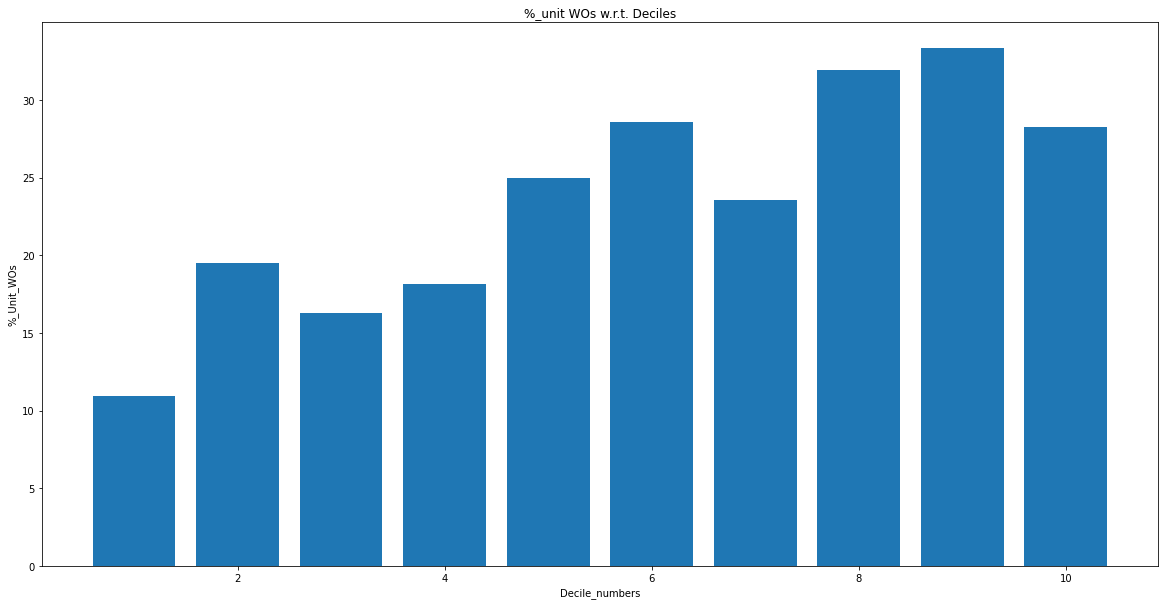

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

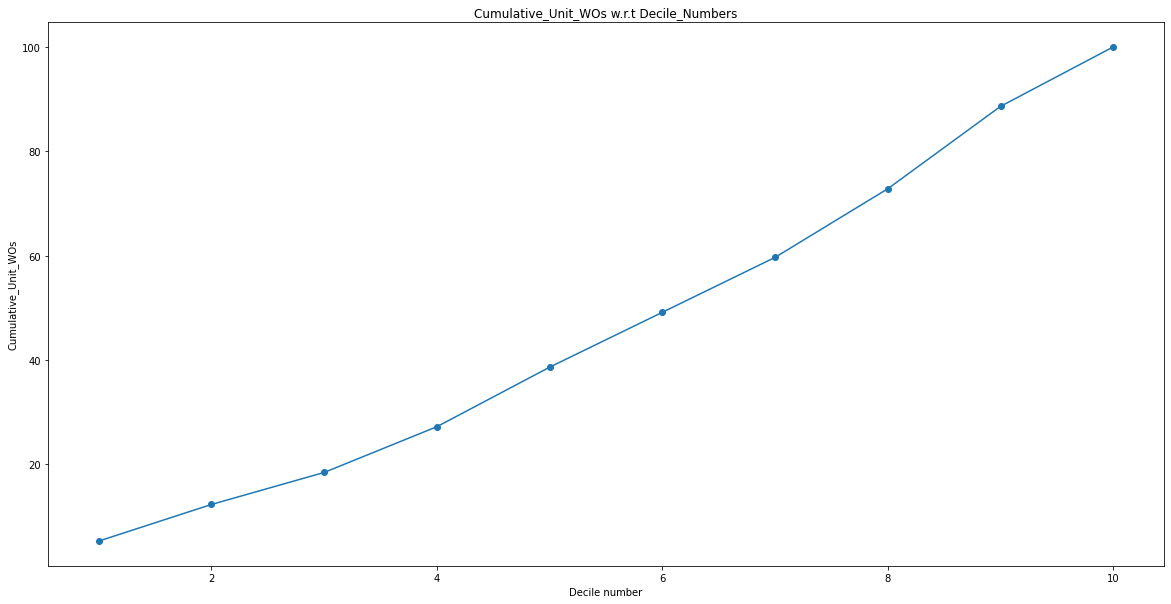

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}